<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ IMPORTS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ IMPORTS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ IMPORTS ✨</span>
</div>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score
import pickle
from collections import defaultdict
from sklearn.utils import shuffle
import os
import cv2
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import pandas as pd

from torchinfo import summary
from sklearn.metrics import confusion_matrix
import seaborn as sns



<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ LOADING THE SPLIT DATA ARRAYS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">📁 reminder to change the folder path to your numpy array folder 📁</span>
</div>

In [2]:
import numpy as np
import os

# Define the folder path
folder_path = r"D:\PYTHONIG\newwindow\NOTEBOOKS_2025\aprilmay2025\data\numpy\cwtnormalized\concatenatedspectrograms"

# Load the numpy files into the respective arrays with the correct capitalized naming
eeg_fold_1 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_1.npy'))
labels_fold_1 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_1.npy'))
patients_fold_1 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_1.npy'))

eeg_fold_2 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_2.npy'))
labels_fold_2 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_2.npy'))
patients_fold_2 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_2.npy'))

eeg_fold_3 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_3.npy'))
labels_fold_3 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_3.npy'))
patients_fold_3 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_3.npy'))

eeg_fold_4 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_4.npy'))
labels_fold_4 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_4.npy'))
patients_fold_4 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_4.npy'))

eeg_fold_5 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_5.npy'))
labels_fold_5 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_5.npy'))
patients_fold_5 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_5.npy'))

eeg_folds = [eeg_fold_1, eeg_fold_2, eeg_fold_3, eeg_fold_4, eeg_fold_5]
labels_folds = [labels_fold_1, labels_fold_2, labels_fold_3, labels_fold_4, labels_fold_5]
patients_folds = [patients_fold_1, patients_fold_2, patients_fold_3, patients_fold_4, patients_fold_5]

for i in range(len(eeg_folds)):
    eeg_folds[i] = eeg_folds[i].astype(np.float16)

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">data balancer & early stopping</span>
</div>

In [3]:
def data_balancer(data, labels, factor):
    # Count the number of samples in each class
    num_class_0 = np.sum(labels == 0)
    num_class_1 = np.sum(labels == 1)
    num_class_2 = np.sum(labels == 2)

    # Find the minimum number of samples across all classes
    min_samples = min(num_class_0, num_class_1, num_class_2)

    # Calculate the number of samples to take from each class
    samples_per_class = min_samples // factor

    # Randomly sample 'samples_per_class' from each class
    class_0_indices = np.random.choice(np.where(labels == 0)[0], samples_per_class, replace=False)
    class_1_indices = np.random.choice(np.where(labels == 1)[0], samples_per_class, replace=False)
    class_2_indices = np.random.choice(np.where(labels == 2)[0], samples_per_class, replace=False)

    # Combine balanced indices
    balanced_indices = np.concatenate((class_0_indices, class_1_indices, class_2_indices))

    # Shuffle the balanced indices
    np.random.shuffle(balanced_indices)

    # Create balanced training data and labels
    balanced_data = data[balanced_indices]
    balanced_labels = labels[balanced_indices]

    return balanced_data, balanced_labels

In [4]:
class EarlyStopping:
    def __init__(self, patience=5):
        """
        Initializes the early stopping mechanism based on divergence detection.

        Args:
            patience (int): Number of consecutive epochs with increasing validation loss
                            before stopping.
        """
        self.patience = patience
        self.best_loss = None
        self.counter = 0
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model):
        """
        Checks if the validation loss is diverging and updates the state accordingly.

        Args:
            val_loss (float): Current epoch's validation loss.
            model (torch.nn.Module): The model being trained.
        """
        if self.best_loss is None or val_loss < self.best_loss:
            # Improvement detected
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0
        else:
            # Validation loss increased
            self.counter += 1
            if self.counter >= self.patience:
                print(f"Divergence detected. Stopping training after {self.counter} epochs.")
                self.early_stop = True

    def load_best_model(self, model):
        """
        Restores the model to the state with the lowest validation loss.

        Args:
            model (torch.nn.Module): The model to restore.
        """
        model.load_state_dict(self.best_model_state)




<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Result plotting</span>
</div>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    auc,
    f1_score,
    balanced_accuracy_score,
    classification_report,
)
from sklearn.preprocessing import label_binarize

def plot_metrics(labels, predictions, n_classes=3):
    """
    Plots and computes metrics for classification tasks.

    Args:
        labels (array-like): True labels.
        predictions (array-like): Predicted probabilities or class predictions.
        n_classes (int): Number of classes (default is 3 for multi-class classification).
    """
    # If predictions are probabilities, convert to class predictions
    if predictions.ndim > 1:
        predicted_classes = np.argmax(predictions, axis=1)
    else:
        predicted_classes = predictions

    # Confusion Matrix
    cm = confusion_matrix(labels, predicted_classes)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Class-wise Accuracy
    print("\nClass-wise Accuracy:")
    for d in range(n_classes):
        correct_preds = cm[d][d]
        total_true_samples = sum(cm[d])
        ratio_correct = correct_preds / total_true_samples if total_true_samples != 0 else 0
        print(f'Class {d}: Correct Predictions / Total True Samples = {correct_preds}/{total_true_samples} ({ratio_correct:.2%})')

    # Precision-Recall Curves and AUPRC
    print("\nPrecision-Recall Curves:")
    labels_binarized = label_binarize(labels, classes=np.arange(n_classes))
    auprcs = []
    for class_idx in range(n_classes):
        precision, recall, _ = precision_recall_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
        auprc = auc(recall, precision)
        auprcs.append(auprc)
        plt.plot(recall, precision, label=f'Class {class_idx + 1} (AUPRC = {auprc:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves for each class')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # ROC Curves and AUC
    print("\nROC Curves:")
    for class_idx in range(n_classes):
        fpr, tpr, _ = roc_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_idx + 1} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for each class')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Mean F1 Score
    f1 = f1_score(labels, predicted_classes, average='macro')
    print(f"\nMean F1 Score: {f1:.4f}")

    # Balanced Accuracy
    balanced_acc = balanced_accuracy_score(labels, predicted_classes)
    print(f"Balanced Accuracy: {balanced_acc:.4f}")

    # Average AUPRC
    mean_auprc = np.mean(auprcs)
    print(f"Average AUPRC: {mean_auprc:.4f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(labels, predicted_classes))

    return {
        "confusion_matrix": cm,
        "class_wise_accuracy": [cm[d][d] / sum(cm[d]) if sum(cm[d]) != 0 else 0 for d in range(n_classes)],
        "mean_f1_score": f1,
        "balanced_accuracy": balanced_acc,
        "average_auprc": mean_auprc,
        "auprc_per_class": auprcs,
    }

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">MODEL GOES HERE</span>
</div>

In [6]:
import torch
import torch.nn as nn
from timm.layers import DropPath, to_2tuple, trunc_normal_

class Mlp(nn.Module):
    def __init__(self, in_features, hidden_features=None, out_features=None, act_layer=nn.GELU, drop=0.):
        super().__init__()
        out_features = out_features or in_features
        hidden_features = hidden_features or in_features
        self.fc1 = nn.Linear(in_features, hidden_features)
        self.act = act_layer()
        self.fc2 = nn.Linear(hidden_features, out_features)
        self.drop = nn.Dropout(drop)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.drop(x)
        return x

def window_partition(x, window_size):
    B, H, W, C = x.shape
    x = x.view(B, H // window_size, window_size, W // window_size, window_size, C)
    windows = x.permute(0, 1, 3, 2, 4, 5).contiguous().view(-1, window_size, window_size, C)
    return windows

def window_reverse(windows, window_size, H, W):
    B = int(windows.shape[0] / (H * W / window_size / window_size))
    x = windows.view(B, H // window_size, W // window_size, window_size, window_size, -1)
    x = x.permute(0, 1, 3, 2, 4, 5).contiguous().view(B, H, W, -1)
    return x

class WindowAttention(nn.Module):
    def __init__(self, dim, window_size, num_heads, qkv_bias=True, qk_scale=None, attn_drop=0., proj_drop=0.):
        super().__init__()
        self.dim = dim
        self.window_size = window_size
        self.num_heads = num_heads
        head_dim = dim // num_heads
        self.scale = qk_scale or head_dim ** -0.5

        self.relative_position_bias_table = nn.Parameter(
            torch.zeros((2 * window_size[0] - 1) * (2 * window_size[1] - 1), num_heads))

        coords_h = torch.arange(self.window_size[0])
        coords_w = torch.arange(self.window_size[1])
        coords = torch.stack(torch.meshgrid([coords_h, coords_w]))
        coords_flatten = torch.flatten(coords, 1)
        relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]
        relative_coords = relative_coords.permute(1, 2, 0).contiguous()
        relative_coords[:, :, 0] += self.window_size[0] - 1
        relative_coords[:, :, 1] += self.window_size[1] - 1
        relative_coords[:, :, 0] *= 2 * self.window_size[1] - 1
        relative_position_index = relative_coords.sum(-1)
        self.register_buffer("relative_position_index", relative_position_index)

        self.qkv = nn.Linear(dim, dim * 3, bias=qkv_bias)
        self.attn_drop = nn.Dropout(attn_drop)
        self.proj = nn.Linear(dim, dim)
        self.proj_drop = nn.Dropout(proj_drop)

        trunc_normal_(self.relative_position_bias_table, std=.02)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x, mask=None):
        B_, N, C = x.shape
        qkv = self.qkv(x).reshape(B_, N, 3, self.num_heads, C // self.num_heads).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]

        q = q * self.scale
        attn = (q @ k.transpose(-2, -1))

        relative_position_bias = self.relative_position_bias_table[self.relative_position_index.view(-1)].view(
            self.window_size[0] * self.window_size[1], self.window_size[0] * self.window_size[1], -1)
        relative_position_bias = relative_position_bias.permute(2, 0, 1).contiguous()
        attn = attn + relative_position_bias.unsqueeze(0)

        if mask is not None:
            nW = mask.shape[0]
            attn = attn.view(B_ // nW, nW, self.num_heads, N, N) + mask.unsqueeze(1).unsqueeze(0)
            attn = attn.view(-1, self.num_heads, N, N)
            attn = self.softmax(attn)
        else:
            attn = self.softmax(attn)

        attn = self.attn_drop(attn)
        x = (attn @ v).transpose(1, 2).reshape(B_, N, C)
        x = self.proj(x)
        x = self.proj_drop(x)
        return x

class SwinTransformerBlock(nn.Module):
    def __init__(self, dim, input_resolution, num_heads, window_size=7, shift_size=0,
                 mlp_ratio=4., qkv_bias=True, qk_scale=None, drop=0., attn_drop=0., drop_path=0.,
                 act_layer=nn.GELU, norm_layer=nn.LayerNorm):
        super().__init__()
        self.dim = dim
        self.input_resolution = input_resolution
        self.num_heads = num_heads
        self.window_size = window_size
        self.shift_size = shift_size
        self.mlp_ratio = mlp_ratio
        if min(self.input_resolution) <= self.window_size:
            self.shift_size = 0
            self.window_size = min(self.input_resolution)
        assert 0 <= self.shift_size < self.window_size, "shift_size must in 0-window_size"

        self.norm1 = norm_layer(dim)
        self.attn = WindowAttention(
            dim, window_size=to_2tuple(self.window_size), num_heads=num_heads,
            qkv_bias=qkv_bias, qk_scale=qk_scale, attn_drop=attn_drop, proj_drop=drop)

        self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()
        self.norm2 = norm_layer(dim)
        mlp_hidden_dim = int(dim * mlp_ratio)
        self.mlp = Mlp(in_features=dim, hidden_features=mlp_hidden_dim, act_layer=act_layer, drop=drop)

        if self.shift_size > 0:
            H, W = self.input_resolution
            img_mask = torch.zeros((1, H, W, 1))
            h_slices = (slice(0, -self.window_size),
                        slice(-self.window_size, -self.shift_size),
                        slice(-self.shift_size, None))
            w_slices = (slice(0, -self.window_size),
                        slice(-self.window_size, -self.shift_size),
                        slice(-self.shift_size, None))
            cnt = 0
            for h in h_slices:
                for w in w_slices:
                    img_mask[:, h, w, :] = cnt
                    cnt += 1

            mask_windows = window_partition(img_mask, self.window_size)
            mask_windows = mask_windows.view(-1, self.window_size * self.window_size)
            attn_mask = mask_windows.unsqueeze(1) - mask_windows.unsqueeze(2)
            attn_mask = attn_mask.masked_fill(attn_mask != 0, float(-100.0)).masked_fill(attn_mask == 0, float(0.0))
        else:
            attn_mask = None

        self.register_buffer("attn_mask", attn_mask)

    def forward(self, x):
        H, W = self.input_resolution
        B, L, C = x.shape
        assert L == H * W, "input feature has wrong size"

        shortcut = x
        x = self.norm1(x)
        x = x.view(B, H, W, C)

        if self.shift_size > 0:
            shifted_x = torch.roll(x, shifts=(-self.shift_size, -self.shift_size), dims=(1, 2))
            x_windows = window_partition(shifted_x, self.window_size)
        else:
            shifted_x = x
            x_windows = window_partition(shifted_x, self.window_size)

        x_windows = x_windows.view(-1, self.window_size * self.window_size, C)
        attn_windows = self.attn(x_windows, mask=self.attn_mask)
        attn_windows = attn_windows.view(-1, self.window_size, self.window_size, C)

        if self.shift_size > 0:
            shifted_x = window_reverse(attn_windows, self.window_size, H, W)
            x = torch.roll(shifted_x, shifts=(self.shift_size, self.shift_size), dims=(1, 2))
        else:
            shifted_x = window_reverse(attn_windows, self.window_size, H, W)
            x = shifted_x
            
        x = x.view(B, H * W, C)
        x = shortcut + self.drop_path(x)
        x = x + self.drop_path(self.mlp(self.norm2(x)))

        return x

class PatchMerging(nn.Module):
    def __init__(self, input_resolution, dim, norm_layer=nn.LayerNorm):
        super().__init__()
        self.input_resolution = input_resolution
        self.dim = dim
        self.reduction = nn.Linear(4 * dim, 2 * dim, bias=False)
        self.norm = norm_layer(4 * dim)

    def forward(self, x):
        H, W = self.input_resolution
        B, L, C = x.shape
        assert L == H * W, "input feature has wrong size"
        assert H % 2 == 0 and W % 2 == 0, f"x size ({H}*{W}) are not even."

        x = x.view(B, H, W, C)

        x0 = x[:, 0::2, 0::2, :]
        x1 = x[:, 1::2, 0::2, :]
        x2 = x[:, 0::2, 1::2, :]
        x3 = x[:, 1::2, 1::2, :]
        x = torch.cat([x0, x1, x2, x3], -1)
        x = x.view(B, -1, 4 * C)

        x = self.norm(x)
        x = self.reduction(x)

        return x

class BasicLayer(nn.Module):
    def __init__(self, dim, input_resolution, depth, num_heads, window_size,
                 mlp_ratio=4., qkv_bias=True, qk_scale=None, drop=0., attn_drop=0.,
                 drop_path=0., norm_layer=nn.LayerNorm, downsample=None):
        super().__init__()
        self.dim = dim
        self.input_resolution = input_resolution
        self.depth = depth

        self.blocks = nn.ModuleList([
            SwinTransformerBlock(dim=dim, input_resolution=input_resolution,
                                 num_heads=num_heads, window_size=window_size,
                                 shift_size=0 if (i % 2 == 0) else window_size // 2,
                                 mlp_ratio=mlp_ratio,
                                 qkv_bias=qkv_bias, qk_scale=qk_scale,
                                 drop=drop, attn_drop=attn_drop,
                                 drop_path=drop_path[i] if isinstance(drop_path, list) else drop_path,
                                 norm_layer=norm_layer)
            for i in range(depth)])

        if downsample is not None:
            self.downsample = downsample(input_resolution, dim=dim, norm_layer=norm_layer)
        else:
            self.downsample = None

    def forward(self, x):
        for blk in self.blocks:
            x = blk(x)
        if self.downsample is not None:
            x = self.downsample(x)
        return x

class PatchEmbed(nn.Module):
    def __init__(self, img_size=224, patch_size=4, in_chans=3, embed_dim=96, norm_layer=None):
        super().__init__()
        img_size = to_2tuple(img_size)
        patch_size = to_2tuple(patch_size)
        patches_resolution = [img_size[0] // patch_size[0], img_size[1] // patch_size[1]]
        self.img_size = img_size
        self.patch_size = patch_size
        self.patches_resolution = patches_resolution
        self.num_patches = patches_resolution[0] * patches_resolution[1]

        self.in_chans = in_chans
        self.embed_dim = embed_dim

        self.proj = nn.Conv2d(in_chans, embed_dim, kernel_size=patch_size, stride=patch_size)
        self.norm = norm_layer(embed_dim) if norm_layer else None

    def forward(self, x):
        B, C, H, W = x.shape
        assert H == self.img_size[0] and W == self.img_size[1], \
            f"Input image size ({H}*{W}) doesn't match model ({self.img_size[0]}*{self.img_size[1]})."
        x = self.proj(x).flatten(2).transpose(1, 2)
        if self.norm is not None:
            x = self.norm(x)
        return x

class SwinTransformer(nn.Module):
    def __init__(self, img_size=224, patch_size=4, in_chans=3, num_classes=1000,
                 embed_dim=96, depths=[2, 2, 6, 2], num_heads=[3, 6, 12, 24],
                 window_size=7, mlp_ratio=4., qkv_bias=True, qk_scale=None,
                 drop_rate=0., attn_drop_rate=0., drop_path_rate=0.1,
                 norm_layer=nn.LayerNorm, ape=False, patch_norm=True, **kwargs):
        super().__init__()

        self.num_classes = num_classes
        self.num_layers = len(depths)
        self.embed_dim = embed_dim
        self.ape = ape
        self.patch_norm = patch_norm
        self.num_features = int(embed_dim * 2 ** (self.num_layers - 1))
        self.mlp_ratio = mlp_ratio

        self.patch_embed = PatchEmbed(
            img_size=img_size, patch_size=patch_size, in_chans=in_chans, embed_dim=embed_dim,
            norm_layer=norm_layer if self.patch_norm else None)
        num_patches = self.patch_embed.num_patches
        patches_resolution = self.patch_embed.patches_resolution
        self.patches_resolution = patches_resolution

        if self.ape:
            self.absolute_pos_embed = nn.Parameter(torch.zeros(1, num_patches, embed_dim))
            trunc_normal_(self.absolute_pos_embed, std=.02)

        self.pos_drop = nn.Dropout(p=drop_rate)

        dpr = [x.item() for x in torch.linspace(0, drop_path_rate, sum(depths))]

        self.layers = nn.ModuleList()
        for i_layer in range(self.num_layers):
            layer = BasicLayer(dim=int(embed_dim * 2 ** i_layer),
                               input_resolution=(patches_resolution[0] // (2 ** i_layer),
                                                patches_resolution[1] // (2 ** i_layer)),
                               depth=depths[i_layer],
                               num_heads=num_heads[i_layer],
                               window_size=window_size,
                               mlp_ratio=self.mlp_ratio,
                               qkv_bias=qkv_bias, qk_scale=qk_scale,
                               drop=drop_rate, attn_drop=attn_drop_rate,
                               drop_path=dpr[sum(depths[:i_layer]):sum(depths[:i_layer + 1])],
                               norm_layer=norm_layer,
                               downsample=PatchMerging if (i_layer < self.num_layers - 1) else None)
            self.layers.append(layer)

        self.norm = norm_layer(self.num_features)
        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.head = nn.Linear(self.num_features, num_classes) if num_classes > 0 else nn.Identity()

        self.apply(self._init_weights)

    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            trunc_normal_(m.weight, std=.02)
            if isinstance(m, nn.Linear) and m.bias is not None:
                nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.LayerNorm):
            nn.init.constant_(m.bias, 0)
            nn.init.constant_(m.weight, 1.0)

    def forward_features(self, x):
        x = self.patch_embed(x)
        if self.ape:
            x = x + self.absolute_pos_embed
        x = self.pos_drop(x)

        for layer in self.layers:
            x = layer(x)

        x = self.norm(x)
        x = self.avgpool(x.transpose(1, 2))
        x = torch.flatten(x, 1)
        return x

    def forward(self, x):
        x = self.forward_features(x)
        x = self.head(x)
        return x

c:\Users\Gabriel\anaconda3\envs\cudaenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Test with demo data & model Summary</span>
</div>

In [7]:
randomdata = torch.randn((1,3,224,224))
tempmodel = SwinTransformer(num_classes=3)
op = tempmodel(randomdata)
op.shape

c:\Users\Gabriel\anaconda3\envs\cudaenv\Lib\site-packages\torch\functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:4312.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


torch.Size([1, 3])

In [8]:
from torchinfo import summary

summary(tempmodel)

Layer (type:depth-idx)                             Param #
SwinTransformer                                    --
├─PatchEmbed: 1-1                                  --
│    └─Conv2d: 2-1                                 4,704
│    └─LayerNorm: 2-2                              192
├─Dropout: 1-2                                     --
├─ModuleList: 1-3                                  --
│    └─BasicLayer: 2-3                             --
│    │    └─ModuleList: 3-1                        224,694
│    │    └─PatchMerging: 3-2                      74,496
│    └─BasicLayer: 2-4                             --
│    │    └─ModuleList: 3-3                        891,756
│    │    └─PatchMerging: 3-4                      296,448
│    └─BasicLayer: 2-5                             --
│    │    └─ModuleList: 3-5                        10,658,952
│    │    └─PatchMerging: 3-6                      1,182,720
│    └─BasicLayer: 2-6                             --
│    │    └─ModuleList: 3-7            

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Training Code</span>
</div>


PARAMETER SET 1/5
Fold No: 1
Epoch [1/100], Loss: 1.1832, Accuracy: 0.3191
Validation Loss: 1.3903, Validation Accuracy: 0.3333
Epoch [2/100], Loss: 1.1263, Accuracy: 0.3508
Validation Loss: 1.1967, Validation Accuracy: 0.3361
Epoch [3/100], Loss: 1.1205, Accuracy: 0.3436
Validation Loss: 1.0885, Validation Accuracy: 0.3891
Epoch [4/100], Loss: 1.0963, Accuracy: 0.3895
Validation Loss: 1.1222, Validation Accuracy: 0.3835
Epoch [5/100], Loss: 1.0967, Accuracy: 0.3864
Validation Loss: 1.1250, Validation Accuracy: 0.4070
Epoch [6/100], Loss: 1.0858, Accuracy: 0.4078
Validation Loss: 0.9325, Validation Accuracy: 0.4931
Epoch [7/100], Loss: 1.0793, Accuracy: 0.4283
Validation Loss: 1.2355, Validation Accuracy: 0.4090
Epoch [8/100], Loss: 1.0782, Accuracy: 0.4371
Validation Loss: 1.0912, Validation Accuracy: 0.4358
Epoch [9/100], Loss: 1.0625, Accuracy: 0.4497
Validation Loss: 1.0387, Validation Accuracy: 0.4270
Epoch [10/100], Loss: 1.0361, Accuracy: 0.4861
Validation Loss: 1.0165, Validat

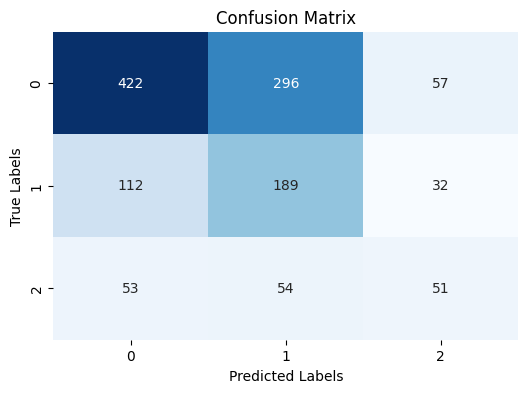


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 422/775 (54.45%)
Class 1: Correct Predictions / Total True Samples = 189/333 (56.76%)
Class 2: Correct Predictions / Total True Samples = 51/158 (32.28%)

Precision-Recall Curves:


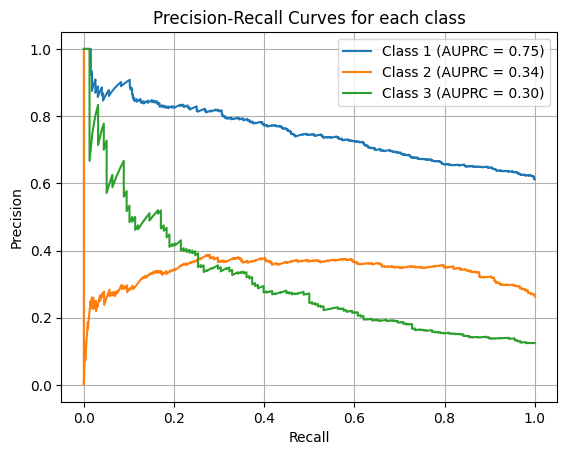


ROC Curves:


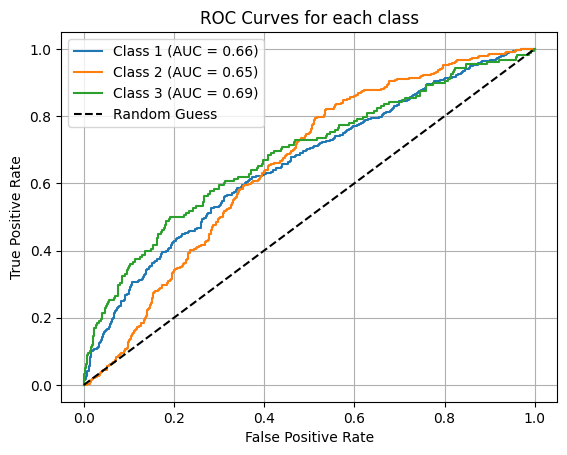


Mean F1 Score: 0.4651
Balanced Accuracy: 0.4783
Average AUPRC: 0.4647

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.54      0.62       775
           1       0.35      0.57      0.43       333
           2       0.36      0.32      0.34       158

    accuracy                           0.52      1266
   macro avg       0.48      0.48      0.47      1266
weighted avg       0.58      0.52      0.54      1266

Fold No: 2
Epoch [1/100], Loss: 1.1517, Accuracy: 0.3600
Validation Loss: 1.1069, Validation Accuracy: 0.3467
Epoch [2/100], Loss: 1.1249, Accuracy: 0.3688
Validation Loss: 1.1302, Validation Accuracy: 0.3826
Epoch [3/100], Loss: 1.1003, Accuracy: 0.3876
Validation Loss: 1.0925, Validation Accuracy: 0.4556
Epoch [4/100], Loss: 1.1040, Accuracy: 0.3955
Validation Loss: 1.2618, Validation Accuracy: 0.3327
Epoch [5/100], Loss: 1.0944, Accuracy: 0.4053
Validation Loss: 1.0974, Validation Accuracy: 0.4698
Epoch [6/100], Los

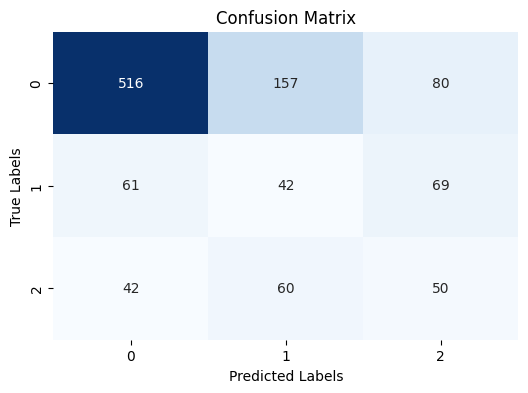


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 516/753 (68.53%)
Class 1: Correct Predictions / Total True Samples = 42/172 (24.42%)
Class 2: Correct Predictions / Total True Samples = 50/152 (32.89%)

Precision-Recall Curves:


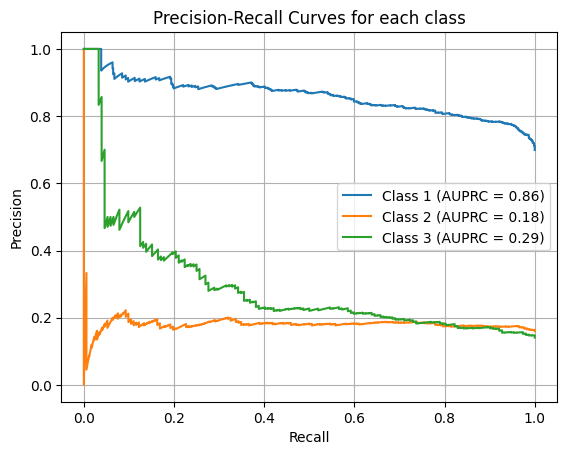


ROC Curves:


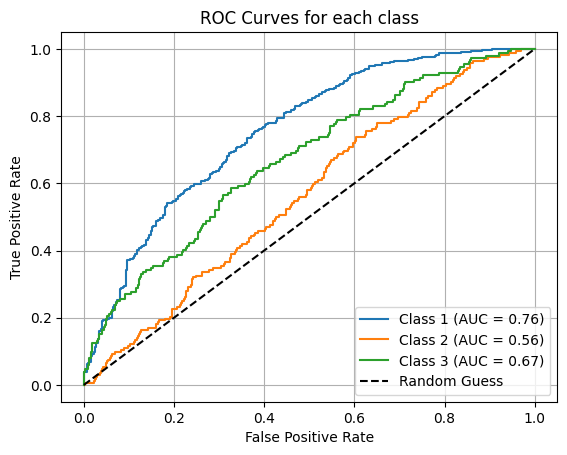


Mean F1 Score: 0.4107
Balanced Accuracy: 0.4195
Average AUPRC: 0.4429

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.69      0.75       753
           1       0.16      0.24      0.19       172
           2       0.25      0.33      0.28       152

    accuracy                           0.56      1077
   macro avg       0.42      0.42      0.41      1077
weighted avg       0.64      0.56      0.60      1077

Fold No: 3
Epoch [1/100], Loss: 1.1826, Accuracy: 0.3625
Validation Loss: 1.1514, Validation Accuracy: 0.2816
Epoch [2/100], Loss: 1.1041, Accuracy: 0.3899
Validation Loss: 1.0396, Validation Accuracy: 0.3717
Epoch [3/100], Loss: 1.0775, Accuracy: 0.4244
Validation Loss: 1.0706, Validation Accuracy: 0.3506
Epoch [4/100], Loss: 1.0735, Accuracy: 0.4536
Validation Loss: 1.1075, Validation Accuracy: 0.3537
Epoch [5/100], Loss: 1.0730, Accuracy: 0.4589
Validation Loss: 1.1164, Validation Accuracy: 0.3604
Epoch [6/100], Los

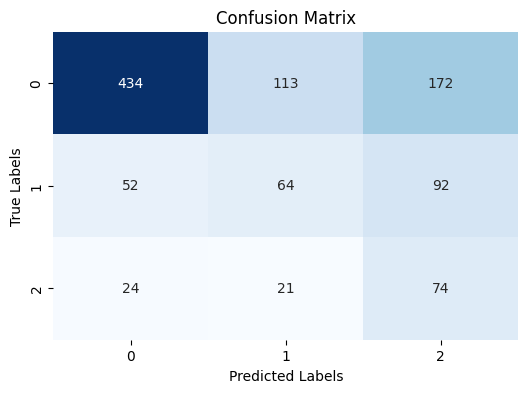


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 434/719 (60.36%)
Class 1: Correct Predictions / Total True Samples = 64/208 (30.77%)
Class 2: Correct Predictions / Total True Samples = 74/119 (62.18%)

Precision-Recall Curves:


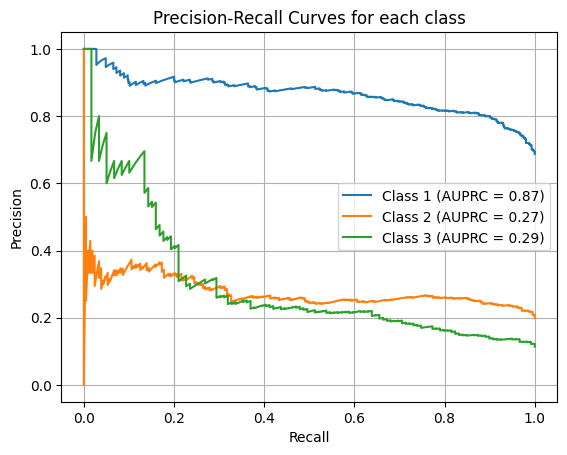


ROC Curves:


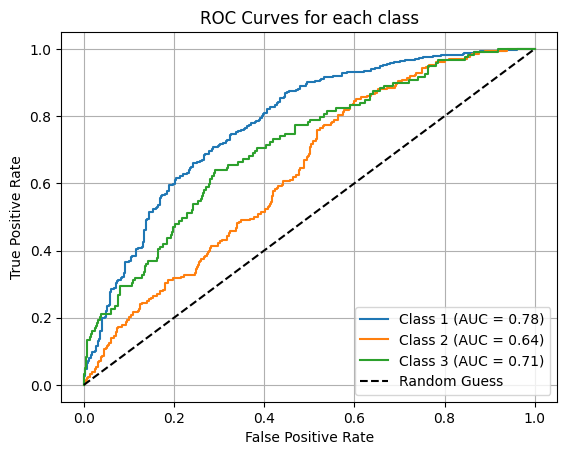


Mean F1 Score: 0.4485
Balanced Accuracy: 0.5111
Average AUPRC: 0.4786

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.60      0.71       719
           1       0.32      0.31      0.32       208
           2       0.22      0.62      0.32       119

    accuracy                           0.55      1046
   macro avg       0.46      0.51      0.45      1046
weighted avg       0.67      0.55      0.59      1046

Fold No: 4
Epoch [1/100], Loss: 1.1926, Accuracy: 0.3325
Validation Loss: 1.2458, Validation Accuracy: 0.3333
Epoch [2/100], Loss: 1.1318, Accuracy: 0.3316
Validation Loss: 1.1059, Validation Accuracy: 0.3349
Epoch [3/100], Loss: 1.1206, Accuracy: 0.3439
Validation Loss: 1.0918, Validation Accuracy: 0.3933
Epoch [4/100], Loss: 1.1166, Accuracy: 0.3668
Validation Loss: 0.9241, Validation Accuracy: 0.3333
Epoch [5/100], Loss: 1.1158, Accuracy: 0.3492
Validation Loss: 0.9988, Validation Accuracy: 0.3358
Epoch [6/100], Los

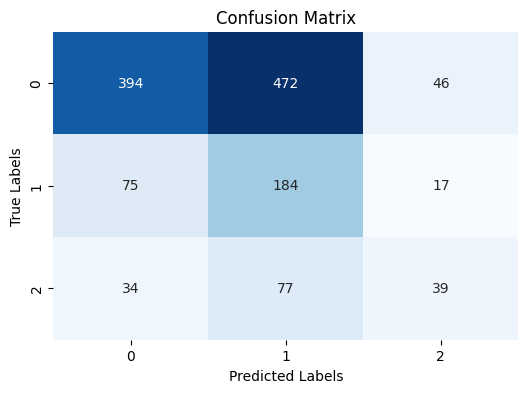


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 394/912 (43.20%)
Class 1: Correct Predictions / Total True Samples = 184/276 (66.67%)
Class 2: Correct Predictions / Total True Samples = 39/150 (26.00%)

Precision-Recall Curves:


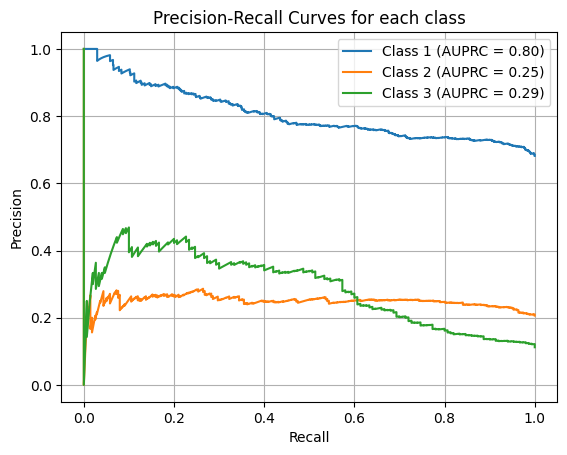


ROC Curves:


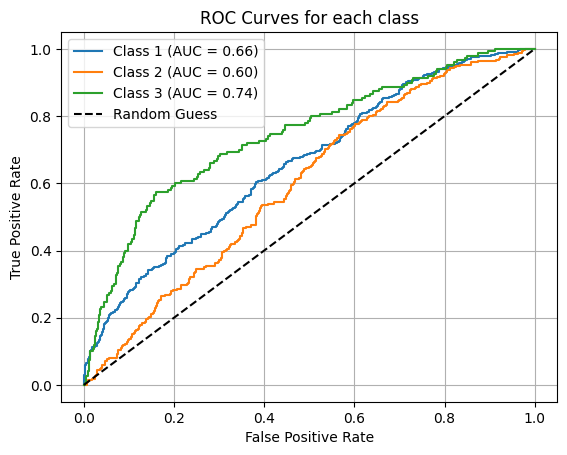


Mean F1 Score: 0.4104
Balanced Accuracy: 0.4529
Average AUPRC: 0.4461

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.43      0.56       912
           1       0.25      0.67      0.36       276
           2       0.38      0.26      0.31       150

    accuracy                           0.46      1338
   macro avg       0.47      0.45      0.41      1338
weighted avg       0.63      0.46      0.49      1338

Fold No: 5
Epoch [1/100], Loss: 1.1667, Accuracy: 0.3294
Validation Loss: 1.0019, Validation Accuracy: 0.3633
Epoch [2/100], Loss: 1.1152, Accuracy: 0.3613
Validation Loss: 0.9896, Validation Accuracy: 0.3690
Epoch [3/100], Loss: 1.1175, Accuracy: 0.3419
Validation Loss: 1.0391, Validation Accuracy: 0.4199
Epoch [4/100], Loss: 1.1057, Accuracy: 0.3776
Validation Loss: 0.9145, Validation Accuracy: 0.3333
Epoch [5/100], Loss: 1.1026, Accuracy: 0.3807
Validation Loss: 1.1379, Validation Accuracy: 0.5137
Epoch [6/100], Los

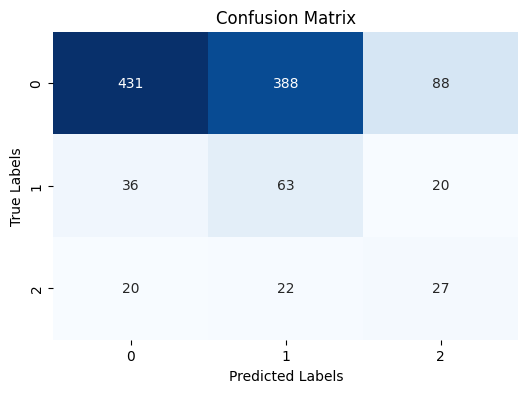


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 431/907 (47.52%)
Class 1: Correct Predictions / Total True Samples = 63/119 (52.94%)
Class 2: Correct Predictions / Total True Samples = 27/69 (39.13%)

Precision-Recall Curves:


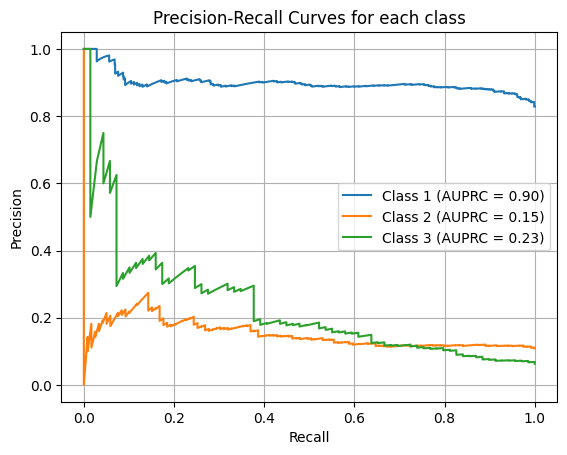


ROC Curves:


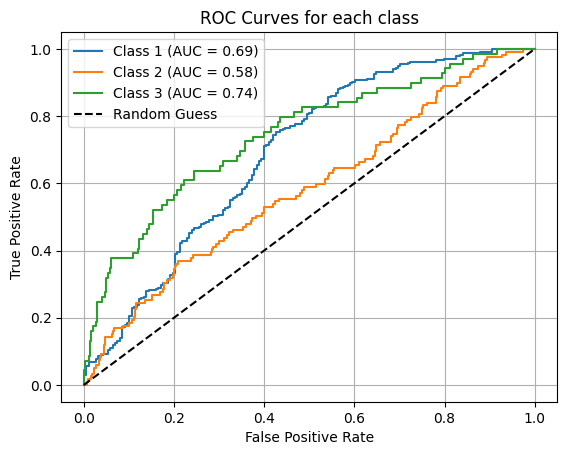


Mean F1 Score: 0.3653
Balanced Accuracy: 0.4653
Average AUPRC: 0.4245

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.48      0.62       907
           1       0.13      0.53      0.21       119
           2       0.20      0.39      0.26        69

    accuracy                           0.48      1095
   macro avg       0.41      0.47      0.37      1095
weighted avg       0.76      0.48      0.55      1095


RESULTS FOR PARAMETER SET 1
Balanced Accuracy for each fold: ['0.4783', '0.4195', '0.5111', '0.4529', '0.4653']
Average Balanced Accuracy across all folds: 0.4654
AUPRC for each fold: ['0.4647', '0.4429', '0.4786', '0.4461', '0.4245']
Average AUPRC across all folds: 0.4513
Best fold (Fold 3) class-wise accuracy: ['0.6036', '0.3077', '0.6218']

PARAMETER SET 2/5
Fold No: 1
Epoch [1/100], Loss: 1.1663, Accuracy: 0.3473
Validation Loss: 1.2896, Validation Accuracy: 0.3524
Epoch [2/100], Loss: 1.1338, Accuracy: 0.3660
Val

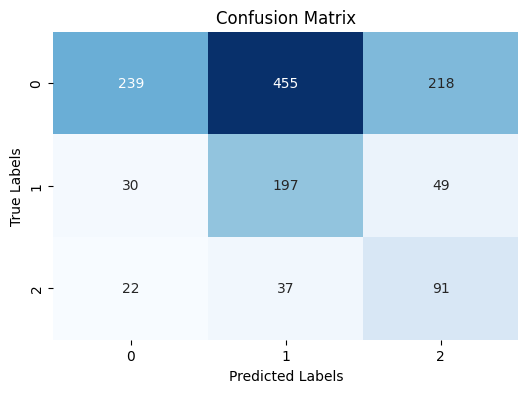


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 239/912 (26.21%)
Class 1: Correct Predictions / Total True Samples = 197/276 (71.38%)
Class 2: Correct Predictions / Total True Samples = 91/150 (60.67%)

Precision-Recall Curves:


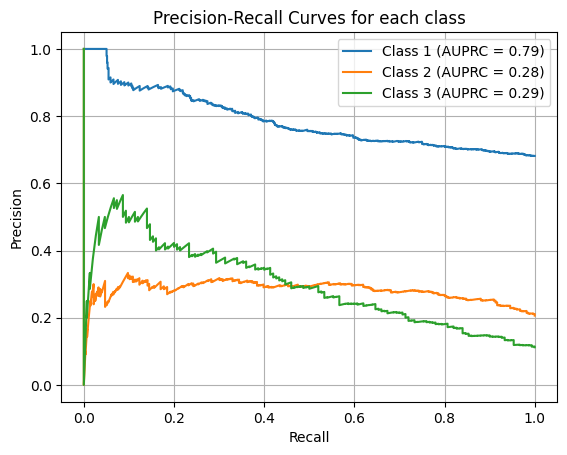


ROC Curves:


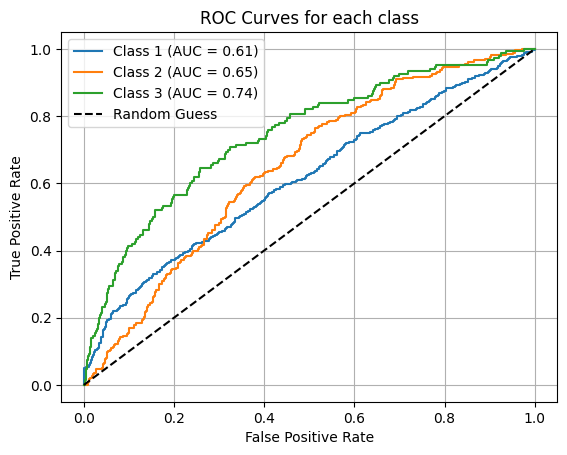


Mean F1 Score: 0.3880
Balanced Accuracy: 0.5275
Average AUPRC: 0.4531

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.26      0.40       912
           1       0.29      0.71      0.41       276
           2       0.25      0.61      0.36       150

    accuracy                           0.39      1338
   macro avg       0.45      0.53      0.39      1338
weighted avg       0.65      0.39      0.40      1338

Fold No: 2
Epoch [1/100], Loss: 1.1902, Accuracy: 0.3369
Validation Loss: 0.9711, Validation Accuracy: 0.3333
Epoch [2/100], Loss: 1.1551, Accuracy: 0.3395
Validation Loss: 1.0057, Validation Accuracy: 0.4145
Epoch [3/100], Loss: 1.1239, Accuracy: 0.3703
Validation Loss: 1.1448, Validation Accuracy: 0.3882
Epoch [4/100], Loss: 1.1169, Accuracy: 0.3571
Validation Loss: 1.1858, Validation Accuracy: 0.3465
Epoch [5/100], Loss: 1.1327, Accuracy: 0.3412
Validation Loss: 1.0421, Validation Accuracy: 0.3974
Epoch [6/100], Los

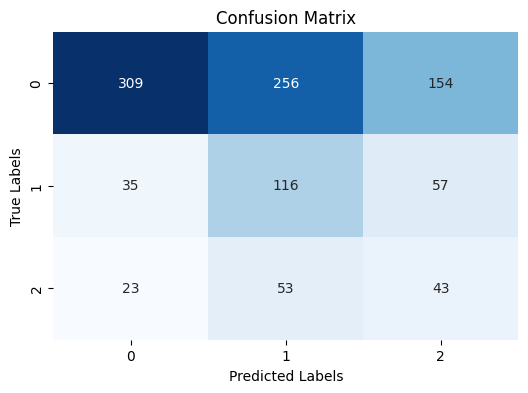


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 309/719 (42.98%)
Class 1: Correct Predictions / Total True Samples = 116/208 (55.77%)
Class 2: Correct Predictions / Total True Samples = 43/119 (36.13%)

Precision-Recall Curves:


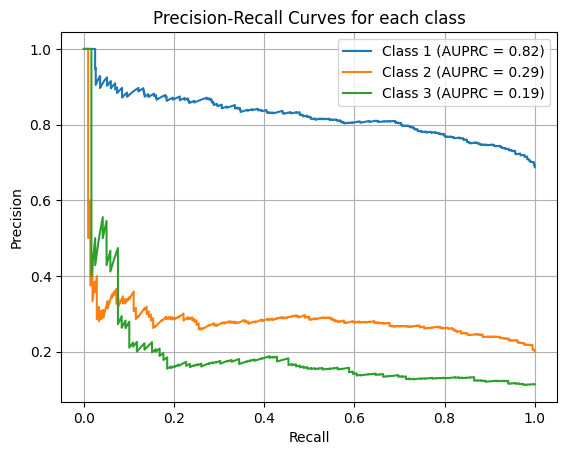


ROC Curves:


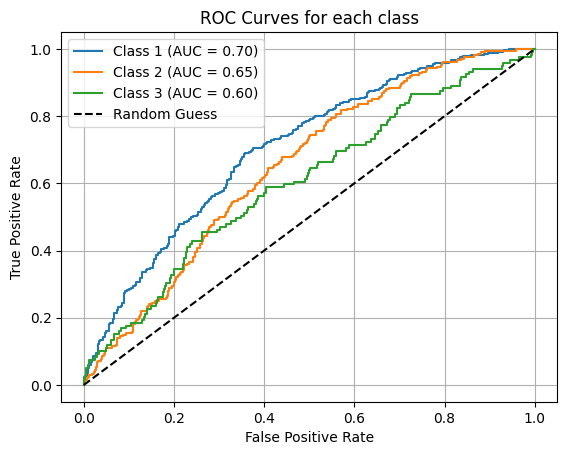


Mean F1 Score: 0.3887
Balanced Accuracy: 0.4496
Average AUPRC: 0.4327

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.43      0.57       719
           1       0.27      0.56      0.37       208
           2       0.17      0.36      0.23       119

    accuracy                           0.45      1046
   macro avg       0.43      0.45      0.39      1046
weighted avg       0.65      0.45      0.49      1046

Fold No: 3
Epoch [1/100], Loss: 1.1896, Accuracy: 0.3288
Validation Loss: 1.3393, Validation Accuracy: 0.3333
Epoch [2/100], Loss: 1.1413, Accuracy: 0.3486
Validation Loss: 1.1647, Validation Accuracy: 0.3413
Epoch [3/100], Loss: 1.1193, Accuracy: 0.3441
Validation Loss: 1.0950, Validation Accuracy: 0.4144
Epoch [4/100], Loss: 1.1150, Accuracy: 0.3801
Validation Loss: 1.0747, Validation Accuracy: 0.4376
Epoch [5/100], Loss: 1.1181, Accuracy: 0.3657
Validation Loss: 1.1899, Validation Accuracy: 0.3808
Epoch [6/100], Los

In [ ]:
import pandas as pd
import os
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc


best_hyperparameters = [
    {"embed_dim": 96, "depths": [2, 2, 18, 2], "num_heads": [4, 8, 16, 32], "window_size": 14, "mlp_ratio": 3.4743437814152234, "drop_rate": 0.2196553774120712, "attn_drop_rate": 0.11422186698873736, "drop_path_rate": 0.1957961691453823, "learning_rate": 2.979913486005799e-05, "weight_decay": 1.7617692096276903e-05, "batch_size": 16, "optimizer": "Adam", "label_smoothing": 0.2, "factor": 1}, # Trial 33, Accuracy: 0.4965
    {"embed_dim": 96, "depths": [2, 2, 18, 2], "num_heads": [3, 6, 12, 24], "window_size": 14, "mlp_ratio": 3.137013405247577, "drop_rate": 0.30093290603784567, "attn_drop_rate": 0.3761388504319039, "drop_path_rate": 0.4065903983467871, "learning_rate": 3.7110385234002754e-05, "weight_decay": 4.897805083879679e-05, "batch_size": 16, "optimizer": "Adam", "label_smoothing": 0.2, "factor": 1}, # Trial 60, Accuracy: 0.4853
    {"embed_dim": 96, "depths": [2, 2, 18, 2], "num_heads": [3, 6, 12, 24], "window_size": 7, "mlp_ratio": 3.7769519132922493, "drop_rate": 0.1984519652418958, "attn_drop_rate": 0.05870537587566105, "drop_path_rate": 0.2552739917649969, "learning_rate": 2.8978023404587194e-05, "weight_decay": 9.696677140914609e-06, "batch_size": 16, "optimizer": "Adam", "label_smoothing": 0.2, "factor": 1}, # Trial 35, Accuracy: 0.4848
    {"embed_dim": 96, "depths": [2, 2, 18, 2], "num_heads": [4, 8, 16, 32], "window_size": 14, "mlp_ratio": 3.1666081222689586, "drop_rate": 0.2648875737075289, "attn_drop_rate": 0.4973540712764486, "drop_path_rate": 0.1749537158109743, "learning_rate": 3.3083402954755556e-05, "weight_decay": 0.0008442710030805027, "batch_size": 16, "optimizer": "Adam", "label_smoothing": 0.2, "factor": 1}, # Trial 15, Accuracy: 0.4820
    {"embed_dim": 128, "depths": [2, 2, 6, 2], "num_heads": [4, 8, 16, 32], "window_size": 14, "mlp_ratio": 2.7289717929028736, "drop_rate": 0.25507221573652655, "attn_drop_rate": 0.020952162053520067, "drop_path_rate": 0.09856910389799566, "learning_rate": 8.406640337210993e-05, "weight_decay": 1.5739588434672217e-05, "batch_size": 16, "optimizer": "Adam", "label_smoothing": 0.2, "factor": 1} # Trial 49, Accuracy: 0.4796
]

# Store results for all parameter sets
all_results = []

for parameter in range(len(best_hyperparameters)):
    
    #clear the GPU cache
    torch.cuda.empty_cache()

    print(f"\n{'='*60}")
    print(f"PARAMETER SET {parameter + 1}/5")
    print(f"{'='*60}")

    # Load the best hyperparameters for the current trial
    
    hyperparameters = best_hyperparameters[parameter]
    # Unpack hyperparameters
    config = {
        "embed_dim": hyperparameters["embed_dim"],
        "depths": hyperparameters["depths"],
        "num_heads": hyperparameters["num_heads"],
        "window_size": hyperparameters["window_size"],
        "mlp_ratio": hyperparameters["mlp_ratio"],
        "drop_rate": hyperparameters["drop_rate"],
        "attn_drop_rate": hyperparameters["attn_drop_rate"],
        "drop_path_rate": hyperparameters["drop_path_rate"],
    }
    
    learning_rate = hyperparameters["learning_rate"]
    weight_decay = hyperparameters["weight_decay"]
    batch_size = hyperparameters["batch_size"]
    optimizer = hyperparameters["optimizer"]
    label_smoothing = hyperparameters["label_smoothing"]
    factor = hyperparameters["factor"]

    # Fold indices and other configurations
    num_folds = 5
    fold_indices = np.random.permutation(np.arange(num_folds))
    val_fold_indices = np.roll(fold_indices, 1)

    test_folds_chosen = []
    val_folds_chosen = []
    fold_confusion_matrices = []  # To store confusion matrices for each fold
    fold_accuracies = []  # To store balanced accuracy for each fold
    fold_auprcs = []  # To store AUPRC for each fold
    fold_class_accuracies = []  # To store class-wise accuracies for each fold

    # Model and training configurations
    num_classes = 3
    epochs = 100
    input_shape = (3,224,224)  # (channels, height, width)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    
    #set random seed for reproducibility
    torch.manual_seed(42)
    debug_mode_flag = False
    np.random.seed(42)
    
    # Training loop for cross-validation
    for fold_idx in range(num_folds):
        print(f'Fold No: {fold_idx + 1}')
        
        # Initialize model, loss, and optimizer
        fold_model = model = SwinTransformer(
            img_size=224,
            patch_size=4,
            in_chans=3,
            num_classes=num_classes,
            embed_dim=config['embed_dim'],
            depths=config['depths'],
            num_heads=config['num_heads'],
            window_size=config['window_size'],
            mlp_ratio=config['mlp_ratio'],
            qkv_bias=True,
            drop_rate=config['drop_rate'],
            attn_drop_rate=config['attn_drop_rate'],
            drop_path_rate=config['drop_path_rate'],
            norm_layer=nn.LayerNorm
        ).to(device)
        
        criterion = nn.CrossEntropyLoss(label_smoothing=label_smoothing)
        optimizer = optim.Adam(fold_model.parameters(), lr=learning_rate)
        
        # Split data into train, validation, and test sets
        test_fold = fold_indices[fold_idx]
        val_fold = val_fold_indices[fold_idx]
        train_folds = [fold for fold in fold_indices if fold != test_fold and fold != val_fold]

        train_data = np.concatenate([eeg_folds[j] for j in train_folds])
        train_labels = np.concatenate([labels_folds[j] for j in train_folds])
        train_data = train_data.transpose(0, 3, 1, 2)  # Transpose to match PyTorch input format

        test_folds_chosen.append(test_fold)
        val_folds_chosen.append(val_fold)
        
        early_stopping = EarlyStopping(patience=10)
        
        # Training loop
        for epoch in range(epochs):
            balanced_train_data, balanced_train_labels = data_balancer(train_data, train_labels, factor=1)

            train_dataset = TensorDataset(
                torch.tensor(balanced_train_data, dtype=torch.float32).to(device),
                torch.tensor(balanced_train_labels, dtype=torch.long).to(device)
            )
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            
            fold_model.train()
            running_loss = 0.0
            all_preds = []
            all_labels = []
            
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = fold_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                
            epoch_loss = running_loss / len(train_loader)
            epoch_acc = balanced_accuracy_score(all_labels, all_preds)
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

            # Validation loop
            val_data = eeg_folds[val_fold].transpose(0, 3, 1, 2)
            # val_data = eeg_folds[val_fold]
            val_labels = labels_folds[val_fold]
            val_dataset = TensorDataset(
                torch.tensor(val_data, dtype=torch.float32).to(device),
                torch.tensor(val_labels, dtype=torch.long).to(device)
            )
            val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

            fold_model.eval()
            val_loss = 0.0
            val_preds = []
            val_labels_list = []

            with torch.no_grad():
                for val_inputs, val_labels in val_loader:
                    val_outputs = fold_model(val_inputs)
                    loss = criterion(val_outputs, val_labels)
                    val_loss += loss.item()

                    _, val_batch_preds = torch.max(val_outputs, 1)
                    val_preds.extend(val_batch_preds.cpu().numpy())
                    val_labels_list.extend(val_labels.cpu().numpy())

            val_loss /= len(val_loader)
            val_acc = balanced_accuracy_score(val_labels_list, val_preds)
            print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

            early_stopping(val_loss, fold_model)
            if early_stopping.early_stop:
                print("Early stopping")
                break

        # Load the best model
        early_stopping.load_best_model(fold_model)

        # Test loop
        test_data = eeg_folds[test_fold].transpose(0, 3, 1, 2)
        # test_data = eeg_folds[test_fold]
        test_labels = labels_folds[test_fold]
        test_dataset = TensorDataset(
            torch.tensor(test_data, dtype=torch.float32).to(device),
            torch.tensor(test_labels, dtype=torch.long).to(device)
        )
        test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

        fold_model.eval()
        test_probs = []
        test_preds = []
        test_labels_list = []

        with torch.no_grad():
            for test_inputs, test_labels in test_loader:
                test_outputs = fold_model(test_inputs)
                probabilities = torch.softmax(test_outputs, dim=1)
                test_probs.extend(probabilities.cpu().numpy())
                _, preds = torch.max(probabilities, 1)
                test_preds.extend(preds.cpu().numpy())
                test_labels_list.extend(test_labels.cpu().numpy())

        # Compute metrics
        test_acc = balanced_accuracy_score(test_labels_list, test_preds)
        fold_accuracies.append(test_acc)

        cm = confusion_matrix(test_labels_list, test_preds)
        fold_confusion_matrices.append(cm)

        # Calculate class-wise accuracy
        class_report = classification_report(test_labels_list, test_preds, output_dict=True)
        class_accuracies = [class_report[str(i)]['recall'] for i in range(num_classes)]
        fold_class_accuracies.append(class_accuracies)

        test_labels_binarized = label_binarize(test_labels_list, classes=np.arange(num_classes))
        test_auprcs = []
        for class_idx in range(num_classes):
            precision, recall, _ = precision_recall_curve(test_labels_binarized[:, class_idx], np.array(test_probs)[:, class_idx])
            auprc = auc(recall, precision)
            test_auprcs.append(auprc)

        mean_test_auprc = np.mean(test_auprcs)
        fold_auprcs.append(mean_test_auprc)

        print(f'Test Fold {fold_idx + 1}, Mean AUPRC: {mean_test_auprc:.4f}, Balanced Accuracy: {test_acc:.4f}')

        # Use the plot_metrics function to visualize metrics
        plot_metrics(np.array(test_labels_list), np.array(test_probs), n_classes=num_classes)

    # Calculate metrics across all folds
    average_auprc = np.mean(fold_auprcs)
    mean_accuracy = np.mean(fold_accuracies)
    
    # Find best fold (highest balanced accuracy)
    best_fold_idx = np.argmax(fold_accuracies)
    best_fold_class_accuracies = fold_class_accuracies[best_fold_idx]
    
    # Print results for current parameter set
    print(f"\n{'='*50}")
    print(f"RESULTS FOR PARAMETER SET {parameter + 1}")
    print(f"{'='*50}")
    print(f'Balanced Accuracy for each fold: {[f"{acc:.4f}" for acc in fold_accuracies]}')
    print(f'Average Balanced Accuracy across all folds: {mean_accuracy:.4f}')
    print(f'AUPRC for each fold: {[f"{auprc:.4f}" for auprc in fold_auprcs]}')
    print(f'Average AUPRC across all folds: {average_auprc:.4f}')
    print(f'Best fold (Fold {best_fold_idx + 1}) class-wise accuracy: {[f"{acc:.4f}" for acc in best_fold_class_accuracies]}')
    
    # Store results
    result_dict = {
        'parameter_set': parameter + 1,
        'fold_balanced_accuracies': fold_accuracies,
        'mean_balanced_accuracy': mean_accuracy,
        'fold_auprcs': fold_auprcs,
        'mean_auprc': average_auprc,
        'best_fold_idx': best_fold_idx + 1,
        'best_fold_class_accuracies': best_fold_class_accuracies
    }
    all_results.append(result_dict)

# Print summary of all results
print(f"\n{'='*80}")
print("SUMMARY OF ALL PARAMETER SETS")
print(f"{'='*80}")

for i, result in enumerate(all_results):
    print(f"\nParameter Set {result['parameter_set']}:")
    print(f"  Mean Balanced Accuracy: {result['mean_balanced_accuracy']:.4f}")
    print(f"  Mean AUPRC: {result['mean_auprc']:.4f}")
    print(f"  Best Fold: {result['best_fold_idx']}")
    print(f"  Best Fold Class Accuracies: {[f'{acc:.4f}' for acc in result['best_fold_class_accuracies']]}")

# Find overall best parameter set
best_param_set_idx = np.argmax([result['mean_balanced_accuracy'] for result in all_results])
print(f"\nBest Parameter Set: {best_param_set_idx + 1} with Mean Balanced Accuracy: {all_results[best_param_set_idx]['mean_balanced_accuracy']:.4f}")
